## Gastos Deputados Federais no ano de 2019

#### Treinando e aprendendo analisar dados em Python

#### Arrumando e agregando os dados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

In [2]:
dados = pd.read_csv("C:/Users/mcaio/Desktop/Nova pasta/Ano-2019.csv", delimiter= ";")

In [ ]:
dados.tail(20)

In [ ]:
dados.shape

In [3]:
dados = dados.rename(columns = {'X.U.FEFF.txNomeParlamentar': 'NomeParlamentar', 'txtFornecedor': 'fornecedor', 'txtDescricao':'Descricao', 'vlrLiquido':'ValorLiquido','vlrGlosa':'ValorGlosa','vlrDocumento':'ValorDocumento', 'datEmissao':'DataEmissao'})

In [ ]:
#teste = dados.loc[dados["ValorLiquido"] < 118.00, "txNomeParlamentar"]

In [4]:
dados = dados[dados['cpf'].notna()]

### Gastos por Partido

In [ ]:
gastos_partido = dados[dados["numMes"] > 1]

gastos_partido = gastos_partido.groupby(['sgPartido'])['ValorLiquido'].sum().reset_index()


In [ ]:
gastos_partido["ValorLiquido"] = gastos_partido["ValorLiquido"].div(1e6).round(3) 

In [ ]:
gastos_partido.sort_values(by = "ValorLiquido", ascending = False)

In [ ]:
gastos_partido["percentual"] = (gastos_partido["ValorLiquido"] / gastos_partido["ValorLiquido"].sum()*100).round(2)

In [ ]:
gastos_partido = gastos_partido.sort_values(by = "percentual", ascending = False)

In [ ]:
gastos_partido

#### Gráfico

In [ ]:
partido = gastos_partido["sgPartido"]

gastos = gastos_partido["percentual"]

In [ ]:
fig, ax = plt.subplots()
ax.barh(partido, gastos)
ax.invert_yaxis()
ax.set(title = "Percentual(%) de Gastos dos Partidos em 2019", xlabel = "(%) em milhões")

### Gastos por Atividades

In [ ]:
gasto_atividades = dados[dados["numMes"] > 1] 

gasto_atividades = gasto_atividades[gasto_atividades["Descricao"] != "PASSAGEM AÉREA - SIGEPA"]

gasto_atividades = gasto_atividades[gasto_atividades["cpf"].notna()]

In [ ]:
gasto_atividades = gasto_atividades.groupby(['Descricao'])['ValorLiquido'].sum().reset_index()

In [ ]:
gasto_atividades["ValorLiquido"] = gasto_atividades["ValorLiquido"].div(1e6).round(3)

In [ ]:
gasto_atividades = gasto_atividades.sort_values(by = "ValorLiquido", ascending = False)

In [ ]:
gasto_atividades["percentual"] = (gasto_atividades["ValorLiquido"] / gasto_atividades["ValorLiquido"].sum()*100).round(3)

In [ ]:
gasto_atividades

### Gráfico

In [ ]:
atividades = gasto_atividades["Descricao"]

montante = gasto_atividades["ValorLiquido"]

In [ ]:
fig1, graf_atividades = plt.subplots()
graf_atividades.barh(atividades, montante)
graf_atividades.invert_yaxis()
graf_atividades.set(title = "Gastos (em milhões) por atividades em 2019", xlabel = "milhões de reais")

### Deputados que mais Gastaram em 2019

In [5]:
dep_gasto = dados[dados["numMes"] > 1]

dep_gasto = dep_gasto.groupby(['txNomeParlamentar'])["ValorLiquido"].sum().reset_index()

dep_gasto["ValorLiquido"] = dep_gasto["ValorLiquido"].div(1e3).round(3)

dep_gasto = dep_gasto.sort_values(by = "ValorLiquido", ascending = False)

In [7]:
mais_gastaram = dep_gasto.head(10)

#### Gráfico

In [10]:
politico = mais_gastaram["txNomeParlamentar"]

gasto_politico = mais_gastaram["ValorLiquido"]

[Text(0.5, 0, 'VALOR GASTO(MIL REAIS)'),
 Text(0.5, 1.0, 'OS 10 DEPUTADOS FEDERAIS QUE MAIS GASTARAM EM 2019')]

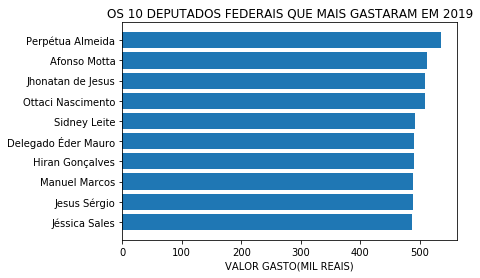

In [12]:
img, graph = plt.subplots()

graph.barh(politico, gasto_politico)
graph.invert_yaxis()
graph.set(title = "OS 10 DEPUTADOS FEDERAIS QUE MAIS GASTARAM EM 2019", xlabel = "VALOR GASTO(MIL REAIS)")

### 10 deputados que menos gastaram

In [13]:
menos_gastaram = dep_gasto.tail(10)

### Gráfico

In [15]:
politicos_menos = menos_gastaram["txNomeParlamentar"]

gastos_menos = menos_gastaram["ValorLiquido"]

[Text(0.5, 0, 'VALOR GASTO(MIL REAIS)'),
 Text(0.5, 1.0, 'OS 10 DEPUTADOS FEDERAIS QUE MENOS GASTARAM EM 2019')]

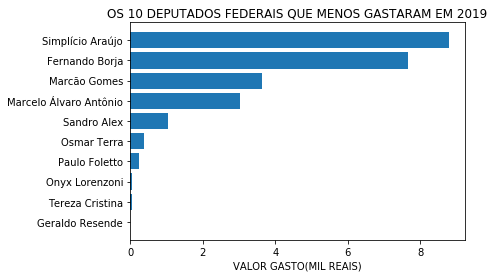

In [16]:
imagem, grafico = plt.subplots()

grafico.barh(politicos_menos, gastos_menos)
grafico.invert_yaxis()
grafico.set(title = "OS 10 DEPUTADOS FEDERAIS QUE MENOS GASTARAM EM 2019", xlabel = "VALOR GASTO(MIL REAIS)")

### Gastos por Estado

In [20]:
gastos_estados = dados[dados["numMes"] > 1]

gastos_estados = gastos_estados.groupby(["sgUF"])["ValorLiquido"].sum().reset_index()

gastos_estados["ValorLiquido"] = gastos_estados["ValorLiquido"].div(1e6).round(3)

gastos_estados = gastos_estados.sort_values("ValorLiquido", ascending = False)

In [21]:
gastos_estados

,sgUF,ValorLiquido
25,SP,23.392
10,MG,18.053
18,RJ,16.345
4,BA,16.018
22,RS,11.454
17,PR,11.443
15,PE,10.019
5,CE,9.608
9,MA,7.490
13,PA,7.453


In [22]:
estados = gastos_estados["sgUF"]

din_estados = gastos_estados["ValorLiquido"]


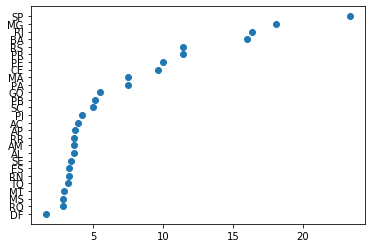

In [39]:
imagem2, gra = plt.subplots()

gra.scatter(din_estados, estados)
gra.invert_yaxis()